In [ ]:
import pandas as pd

 **Introduction**

 The provided dataset offers insights into various advertising campaigns, detailing unique identifiers, dates, tags, subtypes, types, ratings, costs, and predicted click-through rates (CTR). Spanning from 2022 to 2023 these entries encompass a range of advertisement formats, including banners, interstitials, and in-app placements, targeting different categories such as productivity and gaming. Each entry is associated with a specific cost and predicted CTR, providing valuable information for analyzing the effectiveness and efficiency of these advertising strategies. This dataset presents an opportunity to explore trends, patterns, and correlations within the realm of digital advertising during the specified timeframe.



 **Data-Cleaning**

When we cleaned the data, we first checked for missing information in cells. Then, we decided to either remove those rows, since we had enough data, or fill in the missing values. We chose to fill them using the mdoe or most common value for categorical columns. For numerical columns, on the other hand, we used median to fill in the missing values. We also noticed a spelling mistake in one subtype ('gamse' instead of 'Games') and corrected it. After fixing missing data and spelling errors, our data was ready for analysis.*italicized text*




In [ ]:
import pandas as pd

ad_data = pd.read_csv('Ad_Data.csv')

data_cleaned = ad_data.copy()
for column in data_cleaned.columns:
    if data_cleaned[column].dtype == 'object':
        data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace=True)
    else:
        data_cleaned[column].fillna(data_cleaned[column].median(), inplace=True)

data_cleaned['sub_type'] = data_cleaned['sub_type'].replace('Gamse', 'Games')


data_cleaned.to_csv('data_cleaned.csv', index=False)


**Bar Plot**

*   Non-Native Ad Types has higher total count of Predicted CTR
*   On the other hand Non-Native Ad Type has a higher overall cost
*   Average Predicted CTR by Ad Type is almost equal
*   Average Cost by Ad Type is almost equal





<ipython-input-7-3bb3b216c64a>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='predicted_ctr', data=total_predicted_ctr, palette=palette_total_predicted_ctr, ax=axes[0, 0])
<ipython-input-7-3bb3b216c64a>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='cost', data=total_cost, palette=palette_total_cost, ax=axes[0, 1])
<ipython-input-7-3bb3b216c64a>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='predicted_ctr', data=avg_predicted_ctr, palette=palette_avg_predicted_ctr, ax=axes[1, 0])
<ipython-input

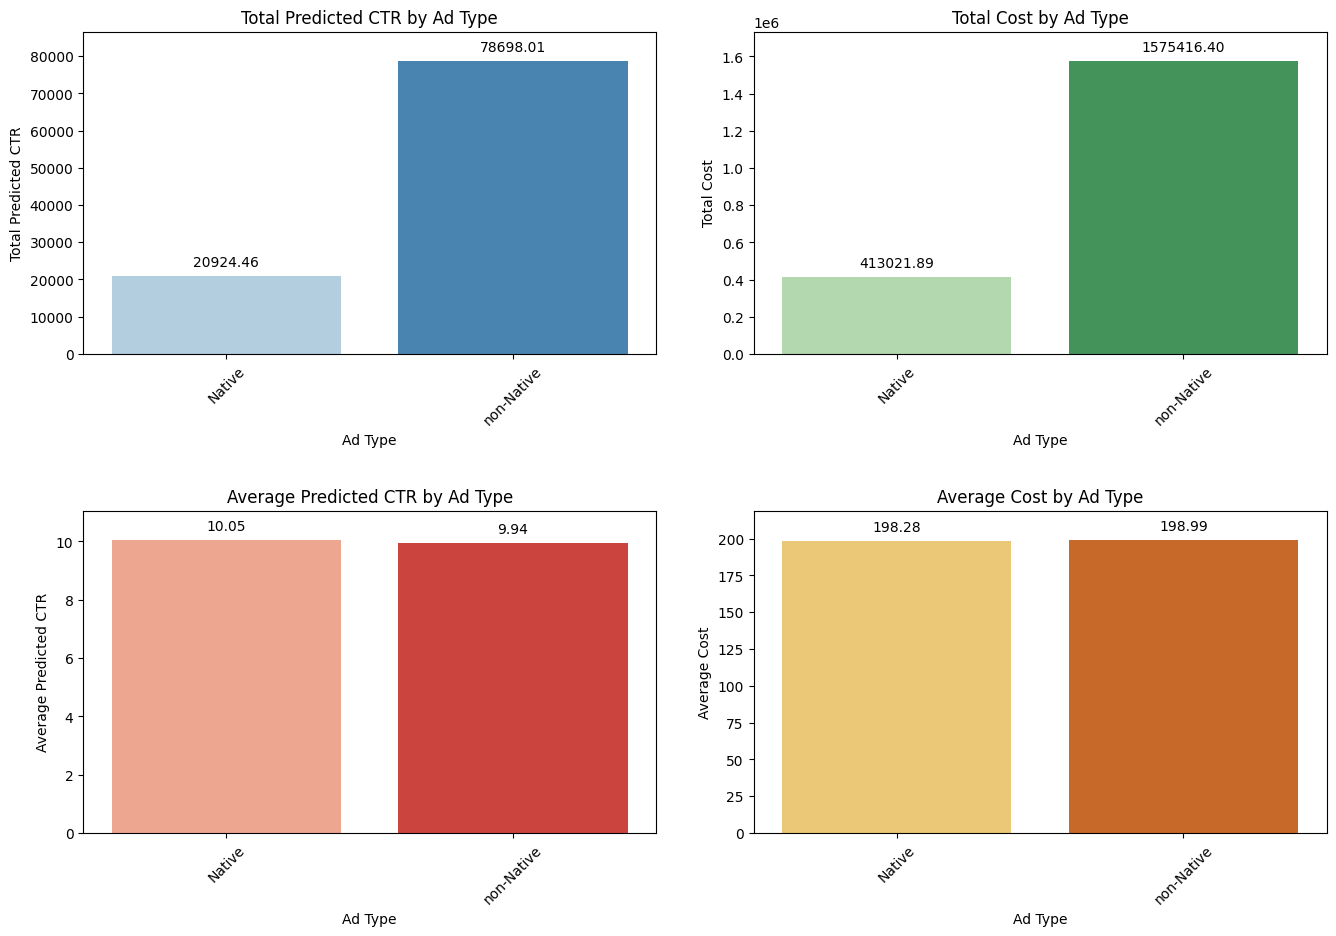

In [ ]:
#Bar Plot

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total predicted_ctr and cost for each type
total_predicted_ctr = data_cleaned.groupby('type')['predicted_ctr'].sum().reset_index()
total_cost = data_cleaned.groupby('type')['cost'].sum().reset_index()

# Calculate the average predicted_ctr and cost for each type
avg_predicted_ctr = data_cleaned.groupby('type')['predicted_ctr'].mean().reset_index()
avg_cost = data_cleaned.groupby('type')['cost'].mean().reset_index()

# Create a color palette for each plot
palette_total_predicted_ctr = sns.color_palette("Blues", len(total_predicted_ctr))
palette_total_cost = sns.color_palette("Greens", len(total_cost))
palette_avg_predicted_ctr = sns.color_palette("Reds", len(avg_predicted_ctr))
palette_avg_cost = sns.color_palette("YlOrBr", len(avg_cost))

# Create subplots for the bar plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Bar plot for total predicted_ctr by type with custom colors and annotations
sns.barplot(x='type', y='predicted_ctr', data=total_predicted_ctr, palette=palette_total_predicted_ctr, ax=axes[0, 0])
axes[0, 0].set_title('Total Predicted CTR by Ad Type')
axes[0, 0].set_xlabel('Ad Type')
axes[0, 0].set_ylabel('Total Predicted CTR')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylim(0, max(total_predicted_ctr['predicted_ctr']) * 1.1)

# Annotate the bars with their values
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                     textcoords='offset points')

# Bar plot for total cost by type with custom colors and annotations
sns.barplot(x='type', y='cost', data=total_cost, palette=palette_total_cost, ax=axes[0, 1])
axes[0, 1].set_title('Total Cost by Ad Type')
axes[0, 1].set_xlabel('Ad Type')
axes[0, 1].set_ylabel('Total Cost')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylim(0, max(total_cost['cost']) * 1.1)

# Annotate the bars with their values
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                     textcoords='offset points')

# Bar plot for average predicted_ctr by type with custom colors and annotations
sns.barplot(x='type', y='predicted_ctr', data=avg_predicted_ctr, palette=palette_avg_predicted_ctr, ax=axes[1, 0])
axes[1, 0].set_title('Average Predicted CTR by Ad Type')
axes[1, 0].set_xlabel('Ad Type')
axes[1, 0].set_ylabel('Average Predicted CTR')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_ylim(0, max(avg_predicted_ctr['predicted_ctr']) * 1.1)

# Annotate the bars with their values
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                     textcoords='offset points')

# Bar plot for average cost by type with custom colors and annotations
sns.barplot(x='type', y='cost', data=avg_cost, palette=palette_avg_cost, ax=axes[1, 1])
axes[1, 1].set_title('Average Cost by Ad Type')
axes[1, 1].set_xlabel('Ad Type')
axes[1, 1].set_ylabel('Average Cost')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_ylim(0, max(avg_cost['cost']) * 1.1)

# Annotate the bars with their values
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                     textcoords='offset points')

# Adjust layout and display the plots
plt.tight_layout(pad=3)
plt.show()


**Box plot**
* The median cost for 'Interstitial' is around 199, with the first
quartile at around 163 and the third quartile at around 234.
* The median cost for 'Banner' is around 200, with the first quartile at around 165 and the third quartile at around 234.
* The median cost for 'In-App' is around 198, with the first quartile at around 163 and the third quartile at around 233.
* The minimum cost for all tags seems to be around 50.
* The maximum cost for all tags is around 400.
  Overall, the box plot shows that the cost for 'Interstitial' is generally higher than the cost for 'Banner' and 'In-App,'

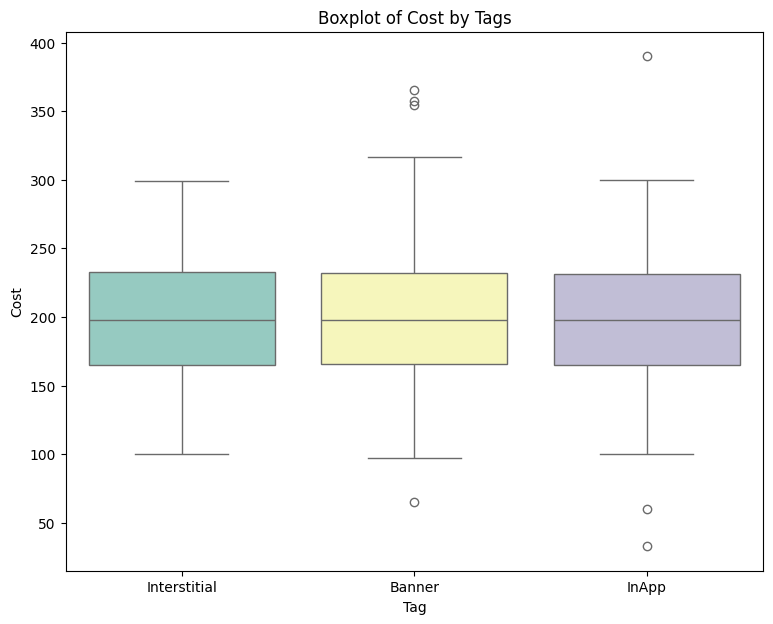

In [ ]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='tag', y='cost', data=data_cleaned, hue='tag', palette='Set3', legend=False)

plt.title('Boxplot of Cost by Tags')
plt.xlabel('Tag')
plt.ylabel('Cost')
plt.show()

**Line Plot**

* Average Cost by Rating: The average cost for PG-17 rated items is
consistently higher than PG-13(i.e. 199.4) rated items.​

* ​Average Cost by Type: It seems that the 'Native' type has the lowest
average cost, while 'Туре' has the highest average cost.​

* ​Average Cost by Sub Type: The sub-type 'Games' has the highest average cost, while 'Health' has the lowest average cost.​

* ​Average Cost by Tag: The tag 'Banner' has the highest average cost, while 'InApp' has the lowest average cost.




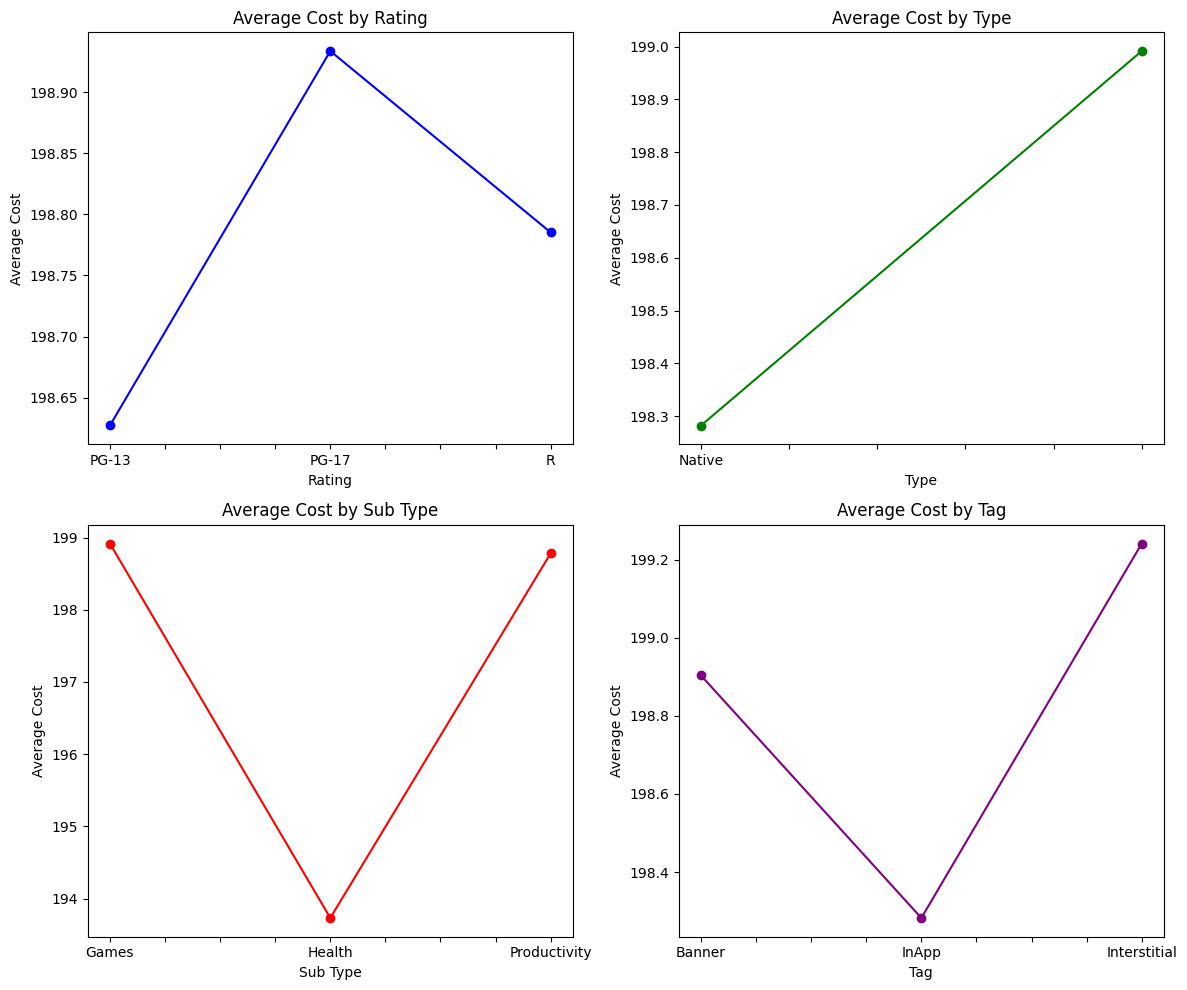

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' column to datetime
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Group the data by 'rating' and calculate the average 'cost' for each 'rating'
rating_grouped = data_cleaned.groupby('rating')['cost'].mean()
plt.subplot(2, 2, 1)
rating_grouped.plot(marker='o', linestyle='-', color='blue')  # Change color to blue
plt.title('Average Cost by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Cost')

# Group the data by 'type' and calculate the average 'cost' for each 'type'
type_grouped = data_cleaned.groupby('type')['cost'].mean()
plt.subplot(2, 2, 2)
type_grouped.plot(marker='o', linestyle='-', color='green')
plt.title('Average Cost by Type')
plt.xlabel('Type')
plt.ylabel('Average Cost')

# Group the data by 'sub_type' and calculate the average 'cost' for each 'sub_type'
sub_type_grouped = data_cleaned.groupby('sub_type')['cost'].mean()
plt.subplot(2, 2, 3)
sub_type_grouped.plot(marker='o', linestyle='-', color='red')
plt.title('Average Cost by Sub Type')
plt.xlabel('Sub Type')
plt.ylabel('Average Cost')

# Group the data by 'tag' and calculate the average 'cost' for each 'tag'
tag_grouped = data_cleaned.groupby('tag')['cost'].mean()
plt.subplot(2, 2, 4)
tag_grouped.plot(marker='o', linestyle='-', color='purple')
plt.title('Average Cost by Tag')
plt.xlabel('Tag')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()


 **Histogram**

- For types of ads, native ads appear to have marginally more CTR than non-native ads​

- A significant chunk of the ad types have lower CTR​

- For sub-types, Health performs relatively weaker than Productivity and Games​

- Higher concentration of ads in the low CTR range for all ad sub-types​

​





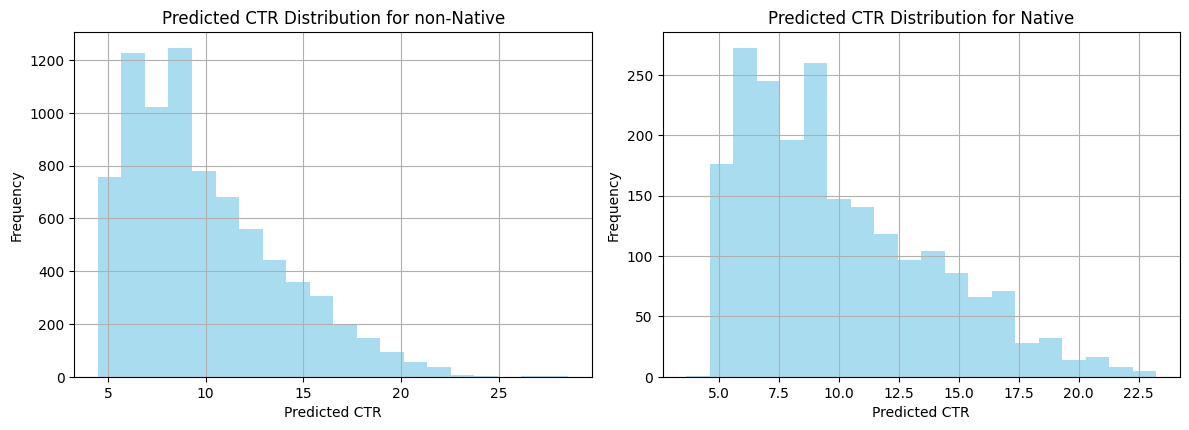

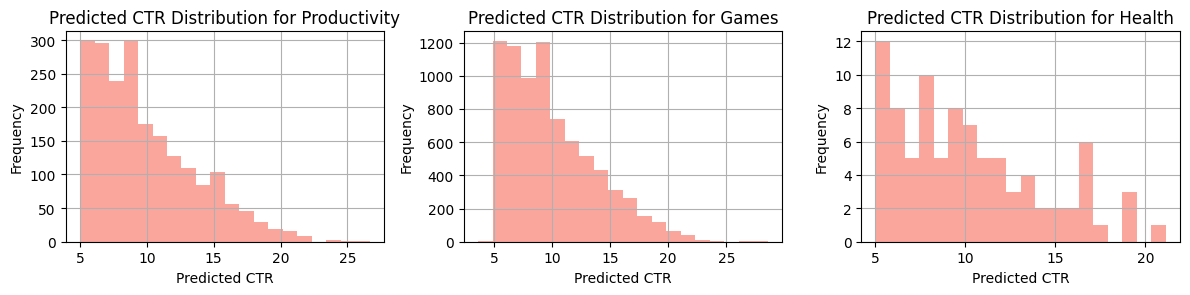

In [ ]:
import matplotlib.pyplot as plt

#separating unique types and sub-types
types = data_cleaned['type'].unique()
sub_types = data_cleaned['sub_type'].unique()

#by type
plt.figure(figsize=(12, 8))
for i, type_ in enumerate(types):
    plt.subplot(2, 2, i+1)
    subset = data_cleaned[data_cleaned['type'] == type_]
    plt.hist(subset['predicted_ctr'], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Predicted CTR Distribution for {type_}')
    plt.xlabel('Predicted CTR')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

#by sub-type
plt.figure(figsize=(12, 8))
for i, sub_type in enumerate(sub_types):
    plt.subplot(3, 3, i+1)
    subset = data_cleaned[data_cleaned['sub_type'] == sub_type]
    plt.hist(subset['predicted_ctr'], bins=20, color='salmon', alpha=0.7)
    plt.title(f'Predicted CTR Distribution for {sub_type}')
    plt.xlabel('Predicted CTR')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

Scatterplot:

* Each tag type is concentrated around the same ctr to cost ratio
* Average CTR is centered around 10 with an average cost of around 200 dollars
* There exists a clear relationship between CTR and Cost for the Games sub-type
* a weaker correlation between CTR and Cost exists for Productivity sub-type
* For the Health sub_type, the data points are too scattered and no useful relationship can be derived from the graph









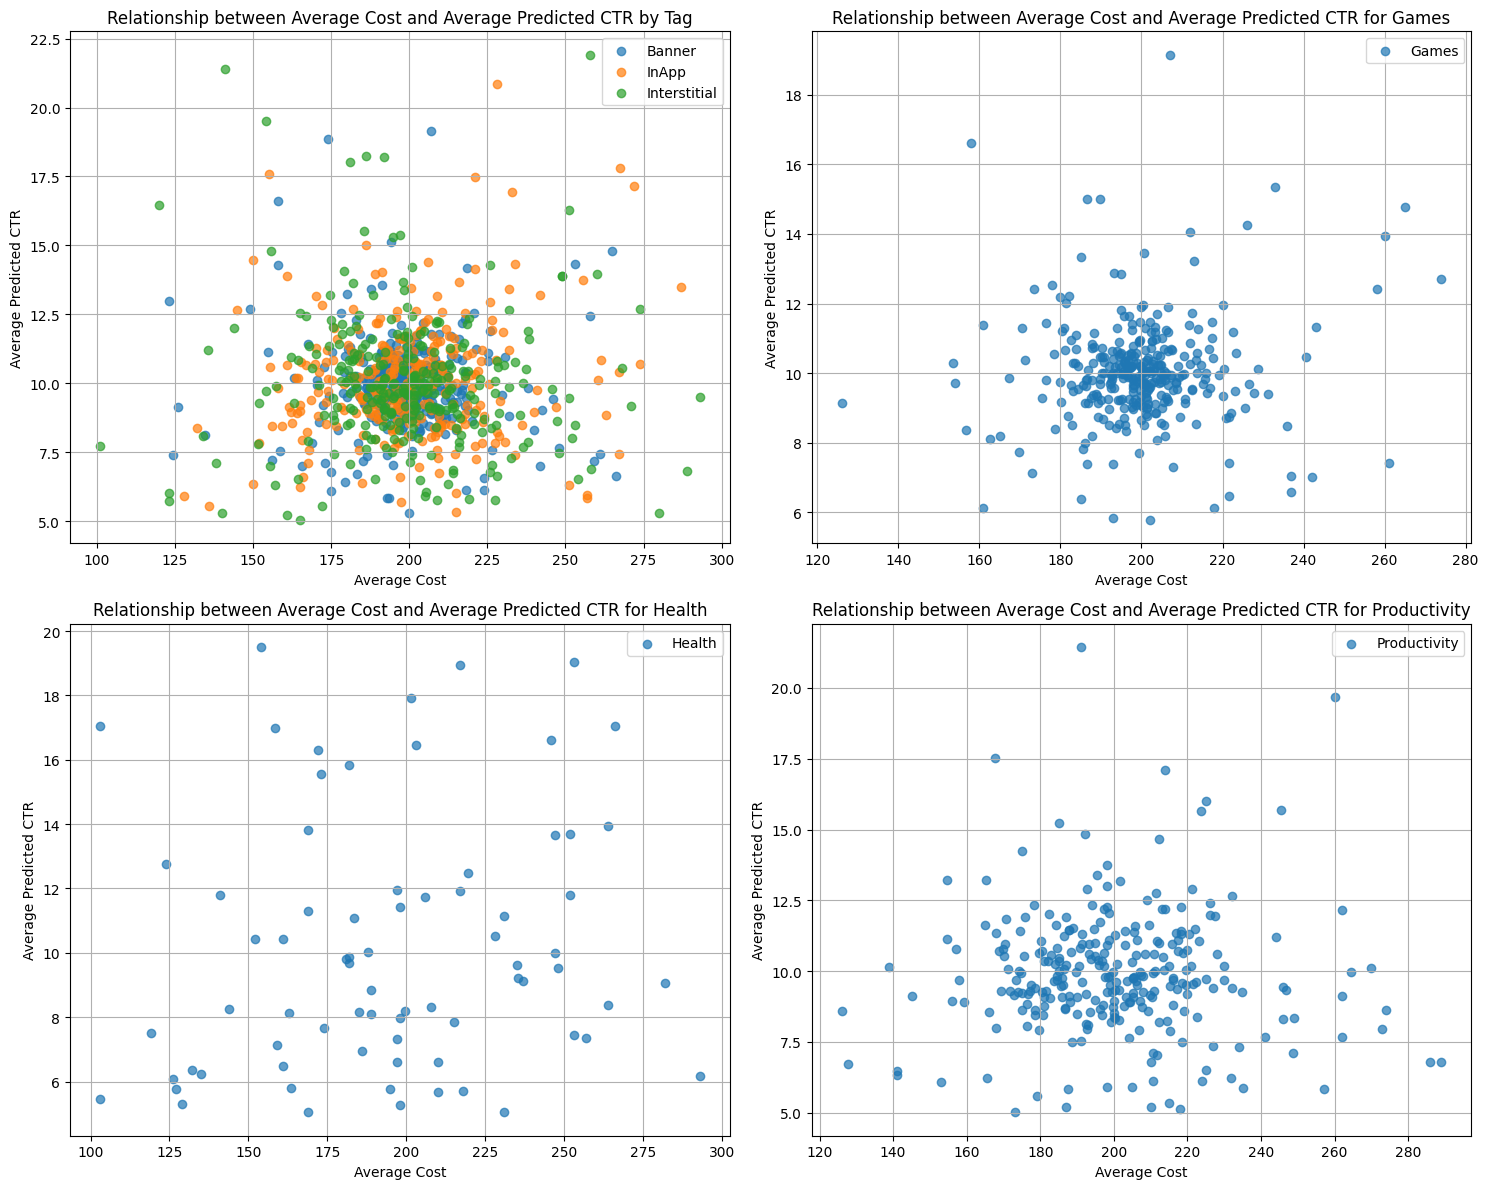

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'date' is in datetime format, if not, convert it first
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# Grouping by tag and date, calculating mean predicted_ctr and mean cost
avg_ctr_cost_by_tag = data_cleaned.groupby(['tag', 'date']).agg({'predicted_ctr': 'mean', 'cost': 'mean'}).reset_index()

# Grouping by sub-type and date, calculating mean predicted_ctr and mean cost
avg_ctr_cost_by_sub_type = data_cleaned.groupby(['sub_type', 'date']).agg({'predicted_ctr': 'mean', 'cost': 'mean'}).reset_index()

# for each tag and sub-type
plt.figure(figsize=(15, 12))

# for each tag
plt.subplot(2, 2, 1)
for i, tag in enumerate(avg_ctr_cost_by_tag['tag'].unique()):
    subset = avg_ctr_cost_by_tag[avg_ctr_cost_by_tag['tag'] == tag]
    plt.scatter(subset['cost'], subset['predicted_ctr'], label=tag, alpha=0.7)
plt.xlabel('Average Cost')
plt.ylabel('Average Predicted CTR')
plt.title('Relationship between Average Cost and Average Predicted CTR by Tag')
plt.legend()
plt.grid(True)

# Plotting scatter plots for each sub-type
sub_types = avg_ctr_cost_by_sub_type['sub_type'].unique()
for i, sub_type in enumerate(sub_types):
    plt.subplot(2, 2, i + 2)
    subset = avg_ctr_cost_by_sub_type[avg_ctr_cost_by_sub_type['sub_type'] == sub_type]
    plt.scatter(subset['cost'], subset['predicted_ctr'], label=sub_type, alpha=0.7)
    plt.xlabel('Average Cost')
    plt.ylabel('Average Predicted CTR')
    plt.title(f'Relationship between Average Cost and Average Predicted CTR for {sub_type}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

**Pie Chart**

*   Distribution of tag consists primarily of "Banner" type
*   Distribution of sub_type consists primarily of "Games" sub_type
*   Distribution of type consists primarily of "Non-Native" type






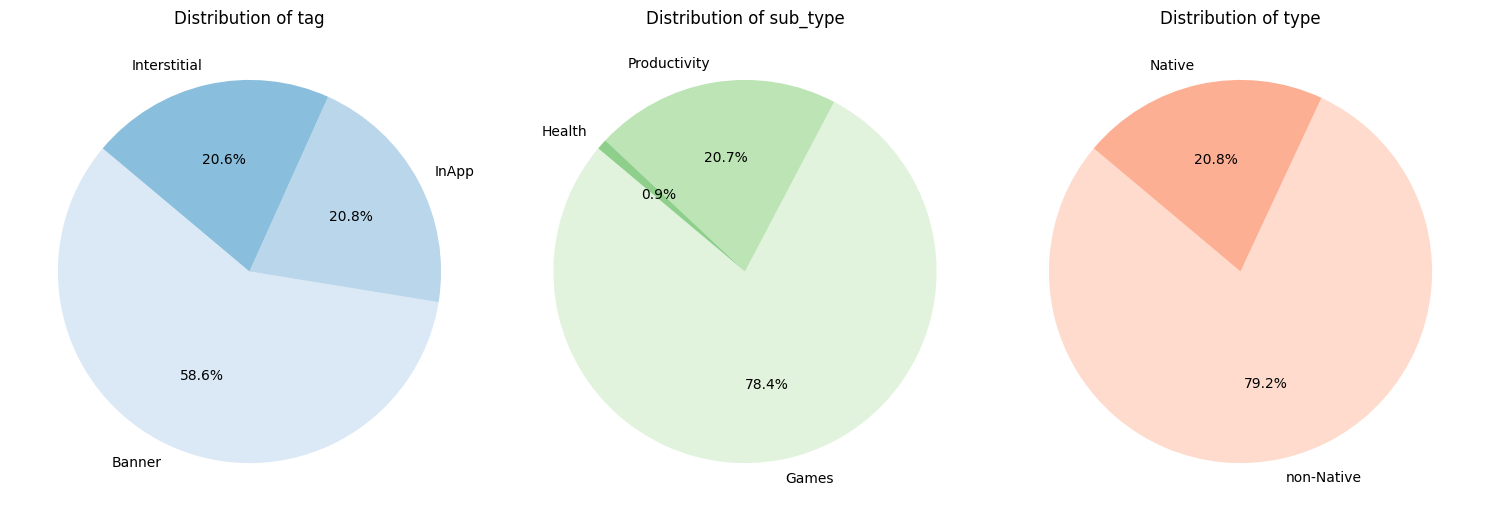

In [ ]:
plt.figure(figsize=(15, 10))
categorical_vars = ['tag', 'sub_type', 'type']
colors = ['Blues', 'Greens', 'Reds']
for i, var in enumerate(categorical_vars):
    var_counts = data_cleaned[var].value_counts()
    plt.subplot(1, 3, i+1)
    plt.pie(var_counts, labels=var_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette(colors[i]))
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()


**Heatmap**



*   Heatmap describes frequency of Ad Categories Based on tag and subtype
*   Any shade of Blue indicates a higher frequency of that variable
*   Any shade of Green indicates a medium frequency of that variable
*   Any shade of Yellow indicates a low frequency of that variable






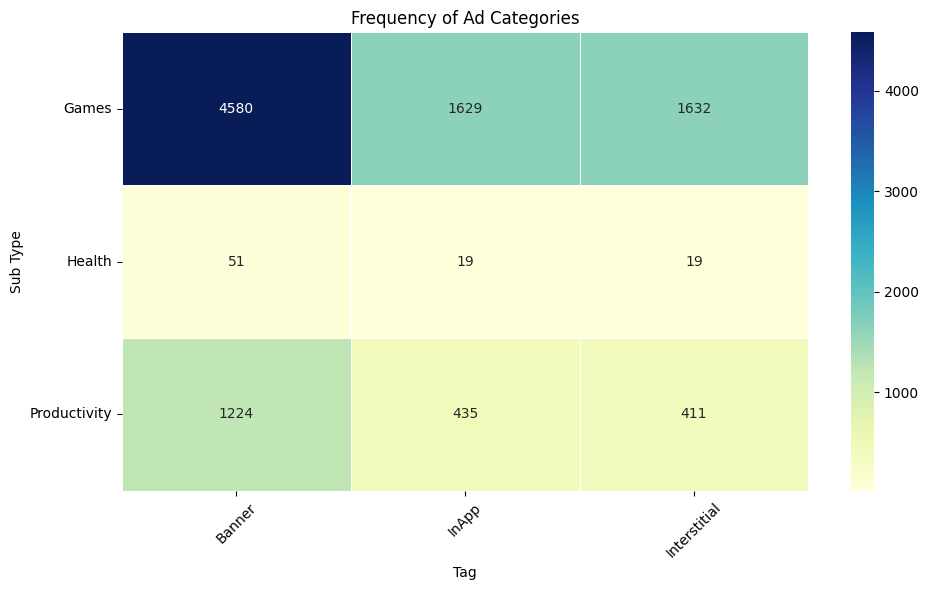

In [ ]:
heatmap_data = data_cleaned[['sub_type', 'tag']]

# Calculate the frequency of each combination of 'sub_type' and 'tag'
heatmap_counts = heatmap_data.groupby(['sub_type', 'tag']).size().unstack(fill_value=0)

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_counts, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Frequency of Ad Categories')
plt.xlabel('Tag')
plt.ylabel('Sub Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Conclusion**

Some of the key findings we identified provided significant insights into how the ads could be adding business value. Targeting native ads with more focus on games and productivity would be one of the optimal paths to take going forward. This would also be cost-efficient as non-native ads are more costly.

 The overall count for Non-native ads is higher due to the uneaven distribution of the dataset however Native ads have slightly better performance. This is because Native ads tend to be more effective in engaging users. Ads related to Health perform relatively weaker in terms of CTR, which could indicate that the target audience for Health-related ads may be less responsive or engaged. Despite the variation in median costs, there is overlap in the interquartile ranges (25th to 75th percentile) for all tag categories, indicating that there may be similar cost distributions among different ad formats. This can be factored into future financial decisions which will be able to prioritize the higher performing ads while spending less on weaker performing ones.

Overall, these interpretations has made it possible for us to estimate the effectiveness and efficiency of various advertising strategies within the digital advertising domain during the specified timeframe. Advertisers can use this information to optimize their campaigns, allocate budgets effectively, and tailor their messaging to target audiences more efficiently.

**Recommendations**

1. The limitations associated with the number of metrics in the dataset made it difficult to expand the scope of extracting quantifiable insights about the performance of the advertisements. So it would have been better to have more metrics to measure the actual impact of the ads. This can be resolved with quantifiable measures such as the reach, return on investment (ROI), awareness and conversion rate.

2. Having comparative data in terms of date would help to understand the trend of the advertisement performance over the years. Since the dataset only takes into account the data collected for the year 2022, it cannot be compared with other years to visualize the growth or decline in longitudinal trends. Without that specific comparative analysis, it can be difficult to strategize from a marketing perspective for the next year.

3. Demographic information can be an effective way to analyze the performance of an advertisement. With this category, each ad can be segmented according to their success rate in reaching their target audience. It would also make it possible to understand the gaps in the market in terms of low awareness or low lead generation, especially if an ad is underperforming in geographical areas that do not align with the target market.

4. Having a more specific idea about the locations of the ads would significantly improve our approach to interpreting the dataset. With the inclusion of locations, the performance of the ads can be categorized to pinpoint which target group has the most potential for growth. This can also be analyzed using heatmaps to separate the strong performing locations from the weak performing ones.
